# Exploratory Data Analysis (EDA)

## Import packages and modules

In [39]:
import csv
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Run necessary scripts

In [40]:
%run /Users/apassan/Documents/03_Professional/07_GitHubRepo/07_CreditCardFraud/scripts/data_prep

## EDA

Note that each row corresponds to a financial transaction.

In [41]:
data_eda = data_raw
data_eda.head()

,repeat_retailer,used_chip,used_pin_number,online_order,fraud,norm_distance_from_home,norm_distance_from_last_transaction,norm_ratio_to_median_purchase_price
0,1.0,1.0,0.0,0.0,0.0,0.477882,-0.182849,0.043491
1,1.0,0.0,0.0,0.0,0.0,-0.241607,-0.188094,-0.189300
2,1.0,0.0,0.0,1.0,0.0,-0.329369,-0.163733,-0.498812
3,1.0,1.0,0.0,1.0,0.0,-0.372854,0.021806,-0.522048
4,1.0,1.0,0.0,1.0,0.0,0.268572,-0.172968,0.142373


In [42]:
display(data_eda.describe())

,repeat_retailer,used_chip,used_pin_number,online_order,fraud,norm_distance_from_home,norm_distance_from_last_transaction,norm_ratio_to_median_purchase_price
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06
mean,0.881536,0.350399,0.100608,0.650552,0.087403,2.283476e-16,7.886189e-17,-2.423837e-16
std,0.323157,0.477095,0.300809,0.476796,0.282425,1.000001e+00,1.000001e+00,1.000001e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,-4.071511e-01,-1.948839e-01,-6.500182e-01
25%,1.000000,0.000000,0.000000,0.000000,0.000000,-3.479205e-01,-1.834088e-01,-4.816812e-01
50%,1.000000,0.000000,0.000000,1.000000,0.000000,-2.547919e-01,-1.562457e-01,-2.952096e-01
75%,1.000000,1.000000,0.000000,1.000000,0.000000,-1.353107e-02,-6.503759e-02,9.722443e-02
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.621956e+02,4.583845e+02,9.500641e+01


- The following columns are binary: repeat_retailer, used_chip, used_pin_number,	online_order, fraud.
- The other three (first) columns are numeric.

<AxesSubplot:>

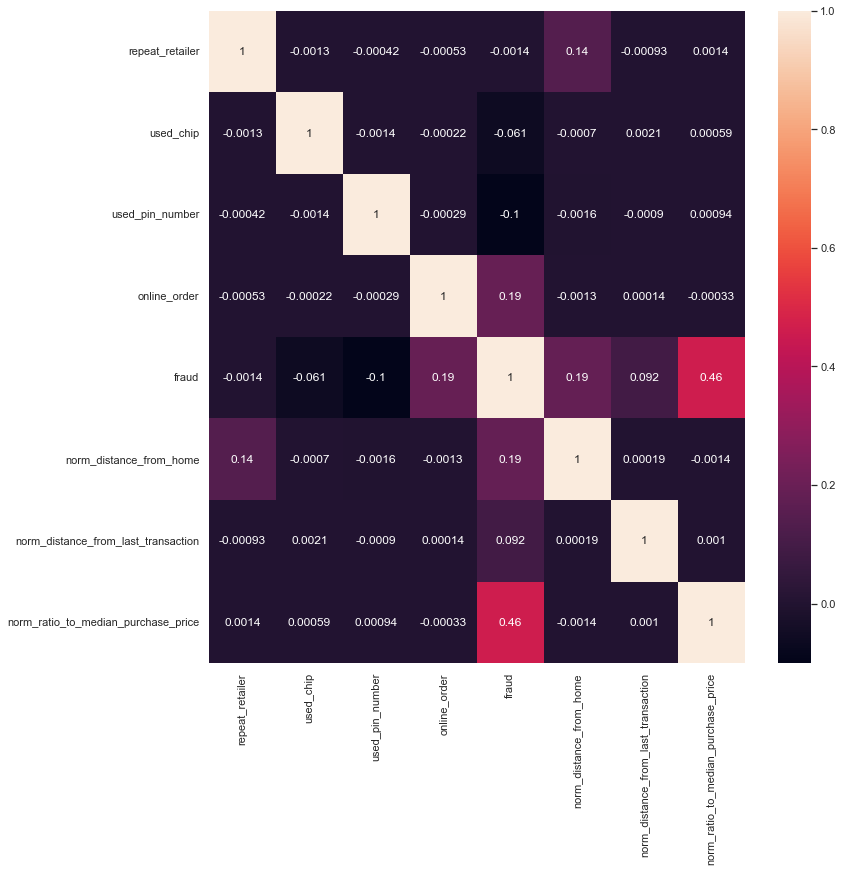

In [43]:
cols = data_eda.columns.tolist()
cm = data_eda[cols].corr().values
sns.set(rc = {'figure.figsize':(12,12)})
sns.heatmap(cm,annot=True, xticklabels = cols, yticklabels = cols)

- Looking at the above correlation matrix heat map, it seems that the variables with the highest correlation seem to be fraud and the ratio of the transaction to the median purchase price of the credit card owner (ratio_to_median_purchase_price). This may indicate that this ratio will have a higher predicting power for fraud compared to the other variables.  
- There do not seem to be any other strong signs of correlation, which for now indicates that we don't need to worry about multi-collinearity. 

[Text(0.5, 1.0, 'Repeat Retailer')]

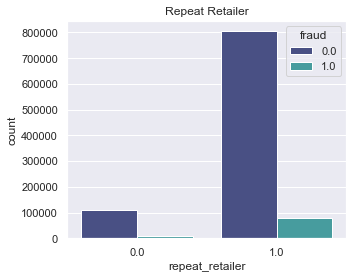

In [44]:
sns.set(rc={"figure.figsize":(5, 4)})
sns.countplot(data =data_eda, x =  'repeat_retailer', hue='fraud', palette = 'mako').set(title = 'Repeat Retailer')

[Text(0.5, 1.0, 'Used Chip')]

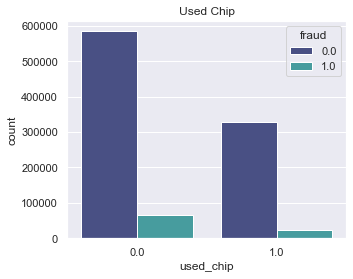

In [45]:
sns.set(rc={"figure.figsize":(5, 4)})
sns.countplot(data =data_eda, x =  'used_chip', hue='fraud', palette = 'mako').set(title = 'Used Chip')

[Text(0.5, 1.0, 'Used Pin Number')]

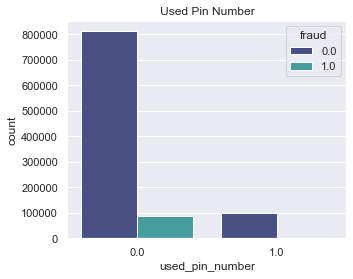

In [46]:
sns.set(rc={"figure.figsize":(5, 4)})
sns.countplot(data =data_eda, x =  'used_pin_number', hue='fraud', palette = 'mako').set(title = 'Used Pin Number')

[Text(0.5, 1.0, 'Online Order')]

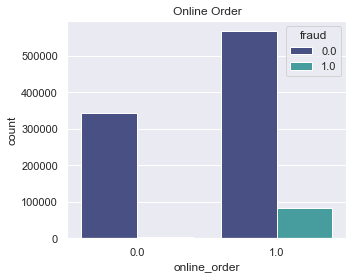

In [47]:
sns.set(rc={"figure.figsize":(5, 4)})
sns.countplot(data =data_eda, x =  'online_order', hue='fraud', palette = 'mako').set(title = 'Online Order')